In [35]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.optim.lr_scheduler as lr_scheduler
from torchmetrics.classification import MulticlassF1Score
import CNNutils as utils
import torch.optim as optim
import torch.nn as nn

In [36]:


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=False, transform=transforms.ToTensor())

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transforms.ToTensor())

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [37]:
Batch_size=32
trainDL=DataLoader(trainset,batch_size=Batch_size)
testDL=DataLoader(testset,batch_size=Batch_size)

In [38]:
trainset[0][0][0].shape

torch.Size([32, 32])

In [39]:
((32/(2**2)))

8.0

In [40]:
model=utils.CNNmodel(3,len(classes),trainset[0][0][0].shape[0],Knums=[16,32,64],Pnums=[32])
optimizer=optim.Adam(model.parameters(),lr=0.001)
scheduler=lr_scheduler.ReduceLROnPlateau(optimizer,patience=5,factor=0.1,mode='max')
lossf=nn.CrossEntropyLoss()
scoref=MulticlassF1Score(num_classes=len(classes))

In [41]:
TRAIN=utils.Train_val(trainDL,testDL,model,optimizer,lossf,scoref)

In [42]:
EPOCH=20
history=TRAIN.train(EPOCH,scheduler,'1')

[1/20]
train loss 1.2257434404666654, train score 0.5128377215508956
test loss 1.582643985748291, test score 0.21666666865348816
scheduler.num_bad_epochs 0/5
[2/20]
train loss 0.9602288002588012, train score 0.6140490490812105
test loss 1.02534818649292, test score 0.2857142984867096
scheduler.num_bad_epochs 0/5
[3/20]
train loss 0.8199482029703131, train score 0.6697002274251793
test loss 0.9907366633415222, test score 0.3125
scheduler.num_bad_epochs 0/5
[4/20]
train loss 0.7419336193925817, train score 0.7017999225637506
test loss 1.1055688858032227, test score 0.3125
scheduler.num_bad_epochs 1/5
[5/20]
train loss 0.6894496763679208, train score 0.7193886046217408
test loss 1.1145890951156616, test score 0.3125
scheduler.num_bad_epochs 2/5
[6/20]
train loss 0.6469681182219597, train score 0.7364938605579137
test loss 1.2992411851882935, test score 0.3125
scheduler.num_bad_epochs 3/5
[7/20]
train loss 0.6127051461585729, train score 0.7477158772892015
test loss 1.2117050886154175, tes

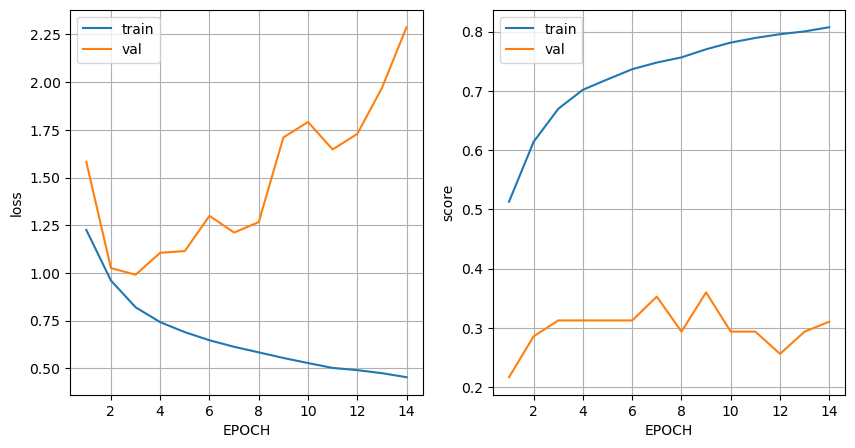

In [43]:
pp=utils.Plot_History(history)
pp.draw()